# Metode Linear Regression:

- Pada tugas kali ini, saya akan menggunakan sebuah dataset yang memiliki 2 fitur yakni: Nominal Tertinggi dan Harga Beli dari Sebuah Uang Lama Rupiah JP Coen
- Tujuan dari tugas ini adalah memprediksi harga lelang jika kondisi tersebut mempunyai Nominal Tertinggi sebanyak 50, 100, 200 dan 300.
- Hipotesis Awal: Uang Lama Rupiah JP Coen dengan Jumlah Nominal Tertinggi harganya lebih mahal jika dibandingkan dengan yang Nominalnya lebih rendah.

### Menggunakan Library:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Menggunakan Data Set:

In [32]:
# Nama datafrane yang kita gunakan adalah df yang berisi data dari Data Lelang.csv
# Hanya menggunakan kolom Nominal Tertinggi dan Harga Beli
df = pd.read_csv('Data Lelang.csv', usecols=['Nominal Tertinggi','Harga Beli'])

### Sneak Peak Data:

In [33]:
# Melihat 5 baris teratas dari dataframe
# Independent variabel(x) adalah Nominal Tertinggi:
# Dependent variabel(y) adalah Harga Beli:
df.head()

,Nominal Tertinggi,Harga Beli
0,50.0,3000000.0
1,50.0,2750000.0
2,50.0,2850000.0
3,50.0,3100000.0
4,50.0,3250000.0


In [37]:
# Mengetahui jumlah kolom dan baris dari data
# Data kita mempunyai 2 kolom dengan 200 baris
df.shape

(20, 2)

In [36]:
# Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nominal Tertinggi  20 non-null     float64
 1   Harga Beli         20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [38]:
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,Nominal Tertinggi,Harga Beli
count,20.000000,2.000000e+01
mean,162.500000,8.223500e+07
std,98.508616,1.070945e+08
min,50.000000,2.750000e+06
25%,87.500000,5.837500e+06
50%,150.000000,3.325000e+07
75%,225.000000,9.750000e+07
max,300.000000,3.200000e+08


### Handling Missing Values:

In [39]:
# Mencari dan menangani missing values
# Ternyata data kita tidak ada missing values
df.isnull().sum()

Nominal Tertinggi    0
Harga Beli           0
dtype: int64

### Exploratory Data Analysis (EDA)

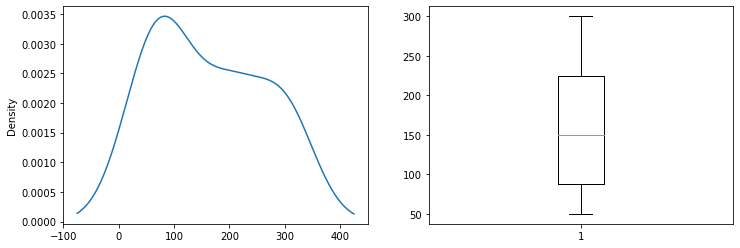

In [35]:
#Univariate analysis horsepower
#Melihat distribusi dari horsepower
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Nominal Tertinggi'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Nominal Tertinggi'])
plt.show()

- Dapat dilihat bahwa density dari Nominal Tertinggi paling tinggi di nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun penyebaran datanya kurang merata (memiliki standard deviasi yang tinggi).

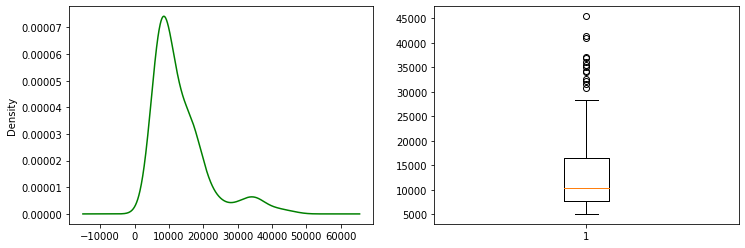

In [69]:
#Univariate analysis price
#Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

- Density dari price paling tinggi di nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

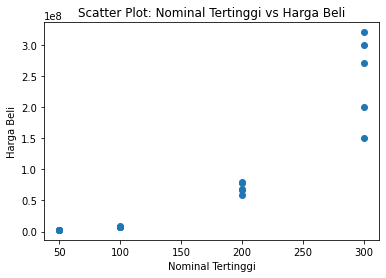

In [40]:
# Bivariate Analysis Nominal Tertinggi dan Harga Beli
# Menggunakan Scatter Plot
plt.scatter(df['Nominal Tertinggi'], df['Harga Beli'])
plt.xlabel('Nominal Tertinggi')
plt.ylabel('Harga Beli')
plt.title('Scatter Plot: Nominal Tertinggi vs Harga Beli')
plt.show()

- Dari scatter plot dapat dilihat bahwa data memiliki korelasi positif yang cukup signifikan.
- Hal ini berarti dengan bertambahnya nilai dari Nominal Tertinggi maka nilai Harga Beli pun akan bertambah

In [42]:
# Mengetahui nilai korelasi dari Nominal Tertinggi dan Harga Beli
df.corr()

,Nominal Tertinggi,Harga Beli
Nominal Tertinggi,1.00000,0.89605
Harga Beli,0.89605,1.00000


- Setelah kita tahu tentang karakteristik data kita, bisa kita lanjutkan ke tahap modelling.

### Modelling:

In [43]:
# Panggil ulang data kita
df.head()

,Nominal Tertinggi,Harga Beli
0,50.0,3000000.0
1,50.0,2750000.0
2,50.0,2850000.0
3,50.0,3100000.0
4,50.0,3250000.0


In [44]:
# Pertama, buat variabel x dan y dari dataframe
x = df['Nominal Tertinggi'].values.reshape(-1,1)
y = df['Harga Beli'].values.reshape(-1,1)

In [45]:
# Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
# Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [47]:
# Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [48]:
# Kelima, cari tau nilai dari slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[952813.97970688]]
[-79116065.38895157]


In [49]:
# Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit tadi
lin_reg.score(x_test, y_test)

0.7968034425273876

- Model kita mendapatkan accuracy score sebesar 79.69%

Text(0.5, 1.0, 'Plot: Nominal Tertinggi vs Harga Beli')

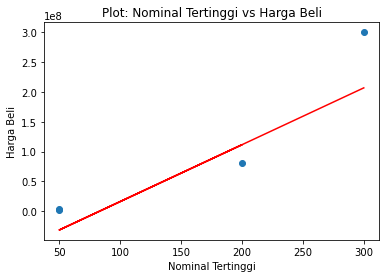

In [50]:
# Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
# Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Nominal Tertinggi')
plt.ylabel('Harga Beli')
plt.title('Plot: Nominal Tertinggi vs Harga Beli')

### Prediction:
- Yuk kita prediksi harga Uang JP Coen ini ketika memiliki Nominal Tertinggi 50, 100, 200, dan 300

In [51]:
# Prediksi harga Uang JP Coen ini dengan Nominal Tertinggi 50
lin_reg.predict([[50]])

array([[-31475366.4036077]])

In [52]:
# Prediksi harga Uang JP Coen ini dengan Nominal Tertinggi 100
lin_reg.predict([[100]])

array([[16165332.58173616]])

In [53]:
# Prediksi harga Uang JP Coen ini dengan Nominal Tertinggi 200
lin_reg.predict([[200]])

array([[1.11446731e+08]])

In [55]:
# Prediksi harga Uang JP Coen ini dengan Nominal Tertinggi 300
lin_reg.predict([[300]])

array([[2.06728129e+08]])

### Kesimpulan Akhir:
- dengan melihat prediksi harga di atas, didapatkan bahwa hipotesis awal kita memang benar yaitu Uang JP Coen dengan Nominal Tertinggi 300 memiliki harga yang lebih mahal daripada yang lain!